In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
def f(x):
    return 3*x**2 - 4*x + 5

In [11]:
x = np.arange(-5., 5., 0.25)

In [13]:
y = f(x)
y

array([60.    , 53.6875, 47.75  , 42.1875, 37.    , 32.1875, 27.75  ,
       23.6875, 20.    , 16.6875, 13.75  , 11.1875,  9.    ,  7.1875,
        5.75  ,  4.6875,  4.    ,  3.6875,  3.75  ,  4.1875,  5.    ,
        6.1875,  7.75  ,  9.6875, 12.    , 14.6875, 17.75  , 21.1875,
       25.    , 29.1875, 33.75  , 38.6875, 44.    , 49.6875, 55.75  ,
       62.1875, 69.    , 76.1875, 83.75  , 91.6875])

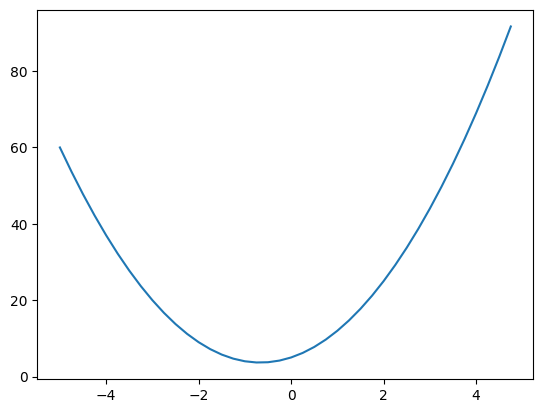

In [16]:
plt.plot(x, y)

In [22]:
h = 0.000001
x = 3.
# Slope /  derivative
(f(x + h) - f(x))/h

14.000003002223593

In [58]:
import math

class Value:
    def __init__(self, data, _prev=(), _op=None):
        """Initialize the value with data and the previous operands and operation
        that created it
        
        Args:
            data: the value we are wrapping
            _prev: A tuple containing the (optional) previous operands that created
                this value
            _op: The operation applied between the operands to create the value
        """
        self.data = data
        # Convert it in a set for efficiency
        self._prev = set(_prev)
        # Placeholder function that performs the backward pass on the value, by computing
        # the gradients of each operand in an operation. This function is defined in
        # each of the operations supported by value
        self._backward = lambda: None
        self._op = _op
        # Initialy we don't have any gradient
        self.grad = 0


    def __repr__(self):
        return f"Value={self.data}"


    def __add__(self, other):
        out = Value(self.data + other.data, _prev=(self, other), _op='+')

        def _backward():
            self.grad = out.grad
            other.grad = out.grad

        out._backward = _backward
        
        return out


    def __mul__(self, other):
        out = Value(self.data * other.data, _prev=(self, other), _op='*')

        def _backward():
            self.grad = out.grad * other.data
            other.grad = out.grad * self.data

        out._backward = _backward

        return out


    def tanh(self):
        x = self.data
        out = Value((math.exp(2*x) - 1) / (math.exp(2*x) + 1), _prev=(self,), _op='tanh')

        def _backward():
            self.grad = (1 - out.data**2) * out.grad

        out._backward = _backward
        return out
        

In [33]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10)
f = Value(-2.0)
e = a * b
d = c + e
L = d * f

Value=-8.0

In [ ]:
# Chain rule
# dL / dc = dL / dd * dd / dc = f * 1 = f = -2.0
# dL / de = dL / dd * dd / de = f * 1 = f = -2.0
# dL / da = dL / de * de / da = f * b = -2.0 * -3.0 = 6.0
# dL / db = dL / de * de / db = f * a = -2.0 * 2.0 = -4.0

In [59]:
x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
x1w1 = x1*w1
x2w2 = x2*w2
x1w1x2w2 = x1w1 + x2w2
b = Value(6.88137358)
n = x1w1x2w2 + b
o = n.tanh();
o

Value=0.707106777676776

In [53]:
# Chain rule
# do / do = 1
# do / dn = do / dn * dn / dn = 1 - tahn(x)**2 * 1 = 1 - o**2
o.grad = 1 - o.data**2
o.grad

0.5000000049635664

In [57]:
# do / dx1w1x2w2 = do / dn * dn / dx1w2x2w2 = 0.5 * 1 = 0.5
# do / db = do / dn * dn / db = 0.5 * 1 = 0.5
x1w1x2w2.grad = o.grad * 1
b.grad = o.grad * 1

# do / dx1w1 = do / dx1w1x2w2 * dx1w1x2w2 / dx1w1 = 0.5 * 1
# do / dx2w2 = do / dx1w1x2w2 * dx1w1x2w2 / dx2w2 = 0.5 * 1
x1w1.grad = x1w1x2w2.grad * 1
x2w2.grad = x1w1x2w2.grad * 1

# do / dx1 = do / dx1w1 * dx1w1 / dx1 = x1w1.grad * w1 = 0.5 * -3.0 = -1.5
# do / dw1 = do / dx1w1 * dx1w1 / dw1 = x1w1.grad * x1 = 0.5 * 2.0 = 1.0
# do / dx2 = do / dx2w2 * dx2w2 / dx2 = x2w2.grad * w2 = 0.5 * 1.0 = 0.5
# do / dw2 = do / dx2w2 * dx2w2 / dw2 = x2w2.grad * x2 = 0.5 * 0.0 = 0.0
x1.grad = -1.5
w1.grad = 1.0
x2.grad = 0.5
w2.grad = 0.0

In [68]:
o.grad = 1.0
o._backward()
n._backward()
b._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()
x1._backward()
x2._backward()
w1._backward()
w2._backward()